# Analisis Predictivo de la Edad del Cangrejo 🦀 


Para un criador comercial de cangrejos, conocer la edad correcta del cangrejo les ayuda a decidir si cosechar los cangrejos y cuándo. Más allá de cierta edad, hay un crecimiento insignificante en las características físicas del cangrejo y, por lo tanto, es importante cronometrar la cosecha para reducir el costo y aumentar las ganancias.

## Descripción de los Datos
Estos Datos fueron extraidos de la plataforma kaggle [Dataset](https://www.kaggle.com/code/umutcindiloglu/crab-age-prediction).

Este conjunto de datos contiene información sobre diferentes características de los cangrejos. Las variables incluidas son:

Columnas:

    •  Sex: Género del cangrejo (Macho, Hembra, Indeterminado).
    •  Length: Longitud del cangrejo (en pies; 1 pie = 30.48 cm).
    •  Diameter: Diámetro del cangrejo (en pies; 1 pie = 30.48 cm).
    •  Height: Altura del cangrejo (en pies; 1 pie = 30.48 cm).
    •  Weight: Peso del cangrejo (en onzas; 1 libra = 16 onzas).
    •  Shucked Weight: Peso del cangrejo sin cáscara (en onzas; 1 libra = 16 onzas).
    •  Viscera Weight: Peso de las vísceras del cangrejo (en onzas; 1 libra = 16 onzas).
    •  Shell Weight: Peso de la cáscara del cangrejo (en onzas; 1 libra = 16 onzas).
    •  Age: Edad del cangrejo (en meses).
Objetivos:
    
+ El primer objetivo es identificar cuáles de las variables disponibles (sexo, longitud, diámetro, altura, peso total, peso sin cáscara, peso de las vísceras y peso de la cáscara) tienen una correlación más fuerte con la edad del cangrejo.

    > Al identificar las variables más influyentes en la determinación de la edad, podemos enfocarnos en medir y registrar estas variables de manera más precisa y eficiente, reduciendo costos operativos.
    
+ El segundo objetivo es desarrollar un modelo de machine learning que permita predecir la edad de un cangrejo en función de sus características físicas.

    > Un modelo preciso permitirá a los criadores tomar decisiones más informadas sobre cuándo cosechar los cangrejos, maximizando así sus ganancias.



## Importamos Librerias

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from visualization.utils import *

## Carga de datos

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sidhus/crab-age-prediction")

print("Path to dataset files:", path)

100%|██████████████████████████████████████| 81.2k/81.2k [00:00<00:00, 33.3MB/s]

Extracting files...
Path to dataset files: /Users/andres/.cache/kagglehub/datasets/sidhus/crab-age-prediction/versions/1


In [12]:
!tree /Users/andres/.cache/kagglehub/datasets/sidhus/

/Users/andres/.cache/kagglehub/datasets/sidhus/
└── crab-age-prediction
    ├── 1.complete
    └── versions
        └── 1
            └── CrabAgePrediction.csv

4 directories, 2 files


In [3]:
path ="/Users/andres/.cache/kagglehub/datasets/sidhus/crab-age-prediction/versions/1"

In [4]:
data = pd.read_csv(path+'/CrabAgePrediction.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


> Contamos con `3893` observaciones y `9` variables, la una varible categoríca con la que contamos es el `Sex`

## Veamos los datos en la tabla

In [19]:
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


# Analisis Exploratorio


In [20]:
data.duplicated().sum()

0

No hay valores duplicados

In [9]:
sum_nan = data.isnull().sum()
print(sum_nan)

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64


No hay valores nulos

In [8]:
data.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


> Se observa que en promedio la `edad` de los cangregos ronda entre lo 10 meses.

> contamos con algunas edades de 29 meses lo que nos indica posibles autlayes para la `edad`

In [11]:
data.describe(include = object)

,Sex
count,3893
unique,3
top,M
freq,1435


In [12]:
data["Sex"].value_counts()

M    1435
I    1233
F    1225
Name: Sex, dtype: int64

+ Notemos que hay más cangrejos de sexo masculino.
+ Ademas seria interezante analisisar a que se debe el `sexo` que no se `identificado`.

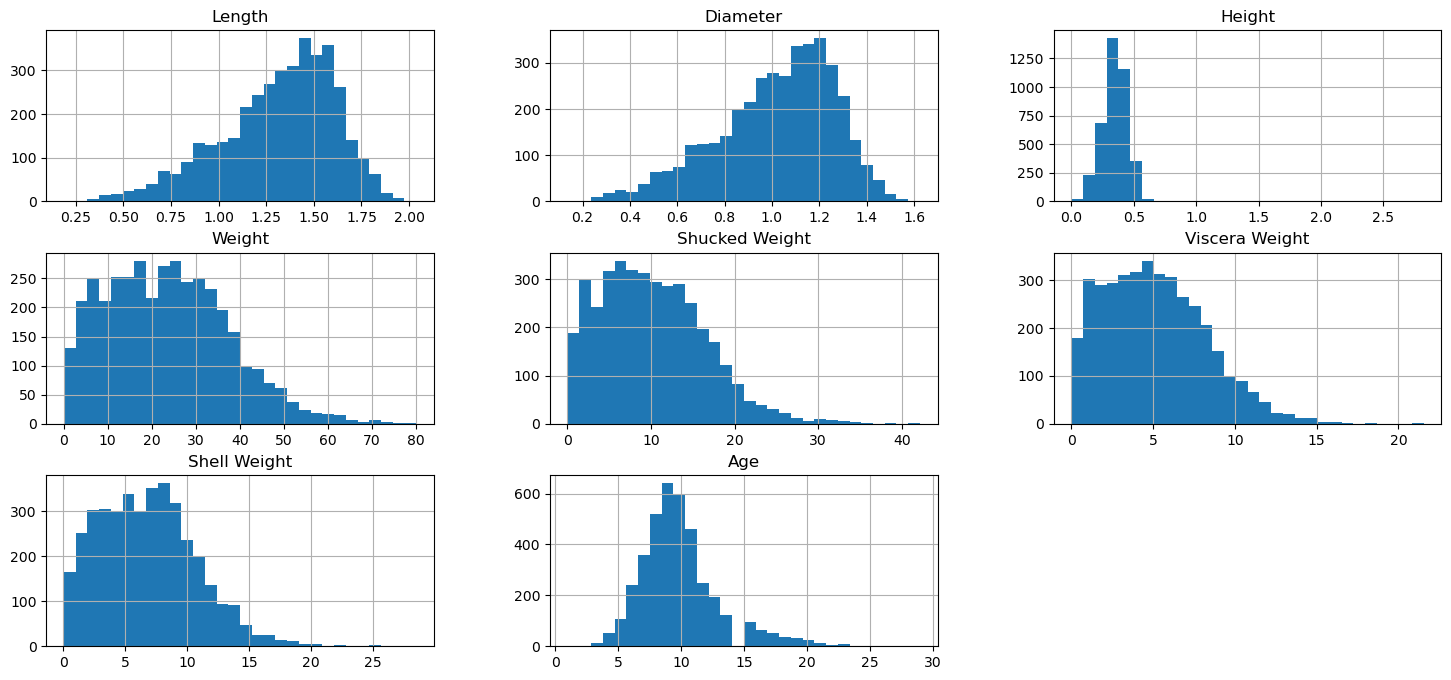

In [8]:
data.hist(bins = 30 ,  figsize=(18, 8))
plt.show()

+ Contamos con distribuciones poco simetricas, y algunas con poca varibilidad como `altura`.
+ Tanto el `Largo` del Cangrejo como el `Diametro` tienen histogramas de frecuencias similares, lo que nos puede llevar a realizar una analisis de correlacion puesto que el cangrego tiene una sierta proporción.
+ De igual forma para las variables que incluyen el peso del cangrejo.

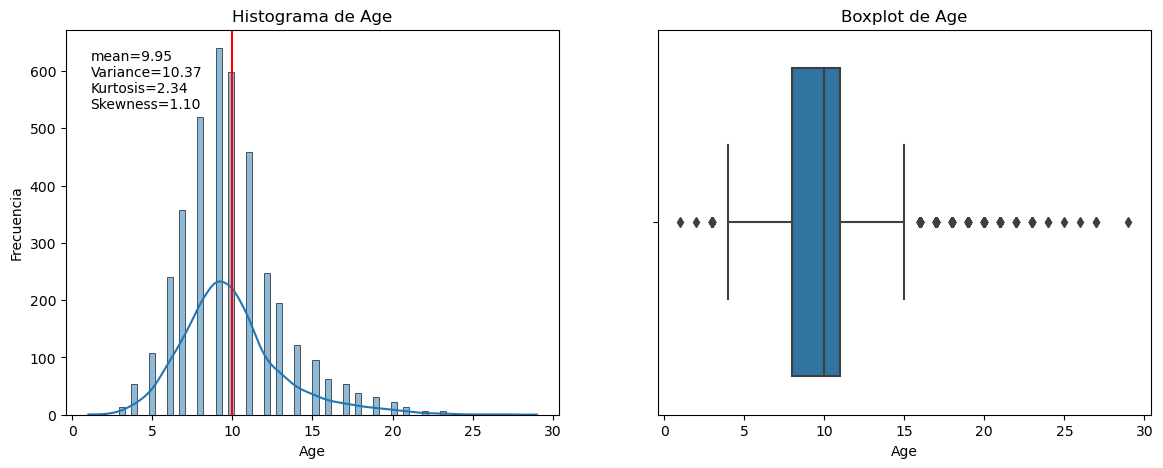

In [40]:
import warnings
warnings.filterwarnings(action='ignore')
histogram_box(data,"Age")

En el grafico de boxplot se observa algunos autliers (valores extremos) inferiores a 3.5 y superiores a 15.5 .

In [6]:
inf= data.Age.quantile(0.25)-(1.5*(data.Age.quantile(0.75) - data.Age.quantile(0.25)))
sup= data.Age.quantile(0.75)+(1.5*(data.Age.quantile(0.75) - data.Age.quantile(0.25)))
print(f"bigote inferior: {inf} \nbigote superior: {sup}")

bigote inferior: 3.5 
bigote superior: 15.5


## Analisis multivariado

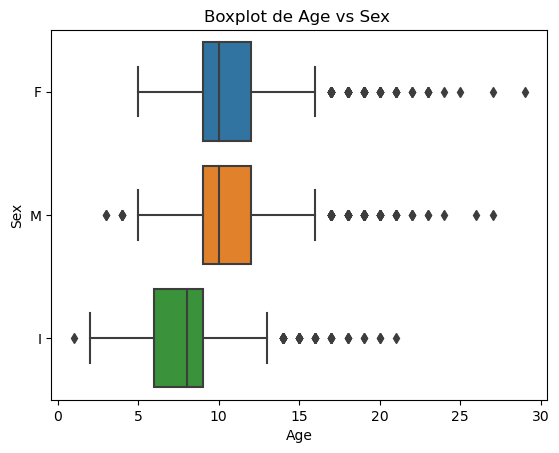

In [31]:
sns.boxplot(data,x='Age',y="Sex")
plt.title("Boxplot de Age vs Sex ")
plt.show()

+ En el grafico se observa que la categoria `Indeterminado`, son cangrejos que en su mayoria corresponden a edades inferiores a 9 meses, esto no sugire que para determinar el `sexo` del cangrejo es recomendable tomar observaciones cuando el cangrejo tenga edades superiores a 9 meses.

+ Ademas podemos esperar que los valores extremos inferiores correspondan a cangrejos con sexo `indeterminados` mientras que para valores extremos superiores correspondan a cangrejos con sexo `Masculino` y `Femenino`.

## Analisis de outliers

In [27]:

print("Numero de outliers encotrados: " ,len(data[data.Age < inf]) + len(data[data.Age>sup]))


Numero de outliers encotrados:  257


Esta cantidad representa un `0.06` del total de los datos, optaremos por aplicar tecnicas de `recorte` o de `limitacion`, esto con el fin de mejorar la forma de la distribución y evitar problemas en el modelo de regresion.

In [17]:
filtrar=list(map(lambda x: x<inf or x>sup,data.Age ))
outliers = data.iloc[filtrar]

In [33]:
outliers.sort_values(by='Age',ascending=False).head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
1729,F,1.7500,1.4625,0.4625,51.241721,20.000572,9.114364,13.466012,29
3069,M,1.6625,1.3375,0.5625,61.901133,21.361348,11.084654,25.089308,27
3522,F,1.3750,1.1625,0.4500,34.373769,9.199413,5.811648,14.883487,27
89,M,1.5000,1.2375,0.4875,29.979596,10.886208,5.386405,10.631063,26
2423,F,1.6125,1.2250,0.5375,39.859397,12.091062,6.477861,14.458245,25


In [7]:
# Eliminacion de outlier
filtrar=list(map(lambda x: ~(x<inf or x>sup),data.Age ))
df_clear = data.iloc[filtrar]

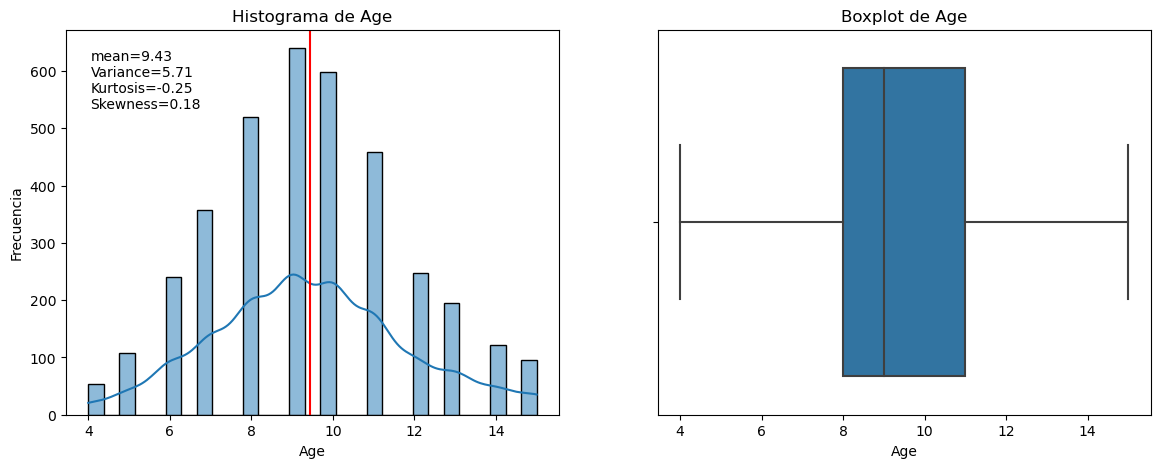

In [41]:
histogram_box(df_clear,'Age')

In [ ]:
##

## Vamos a analizar la correlación entre los atributos

<Axes: >

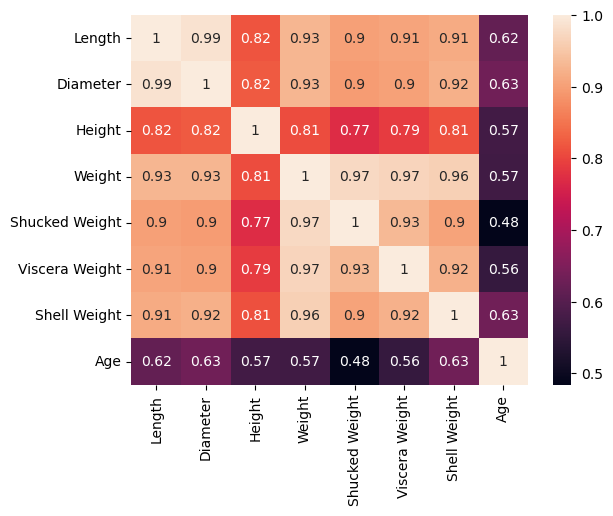

In [14]:
sns.heatmap(df_clear.drop(columns='Sex').corr(),annot=True)

+ Se confirma el supuesto de la fuerte correlación entre `largo` del cangrego y `Diametro`, es decir que cuanto mayor es el largo del cangrejo tambien lo sera su diametro.
+ Las variables que incluyen el peso del cangrejo como `Weight` , `shuc..We`,`Vis..We` y `she..We` tambien presentan una fuerte correlacional positiva, esto era de esperarce, ya que todas se derivan de `Weight`.
+ Por ultimo 


# Preprocesado

#### Note que: 
 - 0 => Femenino
 - 1 => Indeterminado
 - 2 => Masculino


In [7]:
from sklearn.preprocessing import OneHotEncoder


# Preprocesado

In [8]:
df_clear.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [8]:

temp=pd.get_dummies(df_clear["Sex"],dtype=int,prefix ='Sex',drop_first=True)
df_clear.drop(columns='Sex',inplace=True)
df_clear = pd.concat([df_clear,temp],axis=1)

/var/folders/sj/2pt44ndd0wxgy5xwq_c0gggw0000gn/T/ipykernel_2014/2380816390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear.drop(columns='Sex',inplace=True)


In [9]:
df_clear.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,0


In [10]:
df_clear.to_csv("../data/processed/df_clear.csv",index=False)